# KMeans 실습

## 데이터 로드 및 데이터 프레임 만들기

In [2]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns = ['sepal_length','sepal_width','petal_length','petal_width'])
iris_df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## 군집화 모델 생성

In [12]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, random_state =0)
kmeans.fit(iris_df)

KMeans(n_clusters=3, random_state=0)

In [17]:
print(kmeans.labels_)
print(kmeans.cluster_centers_)
iris_df['cluster'] = kmeans.labels_

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [21]:
iris_df['target'] = iris.target

In [25]:
iris_df.groupby(['target','cluster'])['sepal_length'].count()

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64

## 차원축소

In [26]:
from sklearn.decomposition import PCA

In [32]:
pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(iris.data)
pca_transformed

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [33]:
iris_df['pca_x'] = pca_transformed[:,0]
iris_df['pca_y'] = pca_transformed[:,1]

In [47]:
iris_pca = iris_df[['cluster','pca_x','pca_y']]
cluster_0_ind = iris_pca[iris_pca['cluster'] == 0].index
cluster_1_ind = iris_pca[iris_pca['cluster'] == 1].index
cluster_2_ind = iris_pca[iris_pca['cluster'] == 2].index

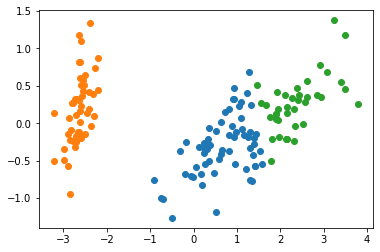

In [48]:
plt.scatter(x = iris_pca.loc[cluster_0_ind, 'pca_x'], y = iris_pca.loc[cluster_0_ind, 'pca_y'])
plt.scatter(x = iris_pca.loc[cluster_1_ind, 'pca_x'], y = iris_pca.loc[cluster_1_ind, 'pca_y'])
plt.scatter(x = iris_pca.loc[cluster_2_ind, 'pca_x'], y = iris_pca.loc[cluster_2_ind, 'pca_y'])

<AxesSubplot:xlabel='cluster', ylabel='sepal_length'>

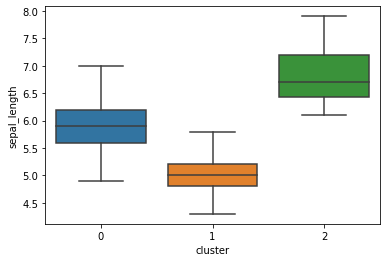

In [45]:
import seaborn as sns
sns.boxplot(data = iris_df, x = 'cluster', y = 'sepal_length')

# MakeBlobs 실습

## 데이터 생성

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [59]:
X,y = make_blobs(n_samples = 200, n_features = 2, centers = 3, cluster_std = 0.8)

In [61]:
unique,counts = np.unique(y, return_counts = True)

In [64]:
import pandas as pd

In [65]:
cluster_df = pd.DataFrame(data = X, columns = ['ftr1', 'ftr2'])
cluster_df

,ftr1,ftr2
0,-1.283497,0.368659
1,-2.456630,0.707648
2,-1.235778,2.179818
3,-3.449196,6.716509
4,-2.263932,4.930965
...,...,...
195,-1.587647,6.630356
196,-4.928266,6.173028
197,-3.855381,6.159658
198,-0.857770,1.776536


In [67]:
cluster_df['target'] = y
cluster_df

,ftr1,ftr2,target
0,-1.283497,0.368659,1
1,-2.456630,0.707648,1
2,-1.235778,2.179818,1
3,-3.449196,6.716509,0
4,-2.263932,4.930965,2
...,...,...,...
195,-1.587647,6.630356,2
196,-4.928266,6.173028,0
197,-3.855381,6.159658,0
198,-0.857770,1.776536,1


## 군집화 결과 시각화

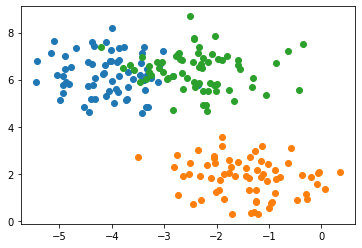

In [69]:
target_list = np.unique(y)

for i in target_list:
    target_cluster = cluster_df[cluster_df['target'] == i]
    plt.scatter(x = target_cluster['ftr1'], y = target_cluster['ftr2'])
    

In [74]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, random_state = 0)
kmeans.fit(X)
cluster_df['cluster'] = kmeans.labels_


In [79]:
cluster_labels = kmeans.fit_predict(X)

In [81]:
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
unique_labels

array([0, 1, 2])

In [84]:
markers=['o', 's', '^', 'P','D','H','x']

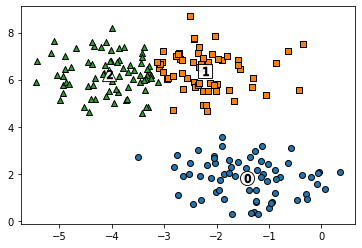

In [87]:
for label in unique_labels:
    result_df = cluster_df[cluster_df['cluster'] == label]
    center_x_y = centers[label]
    plt.scatter(x = result_df['ftr1'], y = result_df['ftr2'], edgecolor = 'k',
               marker = markers[label])
    plt.scatter(x = center_x_y[0], y = center_x_y[1], s=200, color = 'white',
               alpha = 0.9, edgecolor = 'k', marker = markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)
    

# 실루엣 점수 구하기 실습

## 데이터 로드

In [91]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [95]:
iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
iris_df = pd.DataFrame(data = iris.data, columns = feature_names)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## 군집화 실행

In [101]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, random_state = 1)
kmeans.fit(iris.data)
iris_df['cluster'] = kmeans.labels_

In [102]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## 실루엣 점수 구하기

In [116]:
score_samples = silhouette_samples(iris.data, iris_df['cluster'])
print('shape of silhouette_samples( ) return' , score_samples.shape)

shape of silhouette_samples( ) return (150,)


In [117]:
score_samples.shape

(150,)

In [118]:
iris_df['silhouette_coeff'] = score_samples

In [119]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315
3,4.6,3.1,1.5,0.2,1,0.805014
4,5.0,3.6,1.4,0.2,1,0.849302
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0.425136
146,6.3,2.5,5.0,1.9,0,0.104171
147,6.5,3.0,5.2,2.0,2,0.314930
148,6.2,3.4,5.4,2.3,2,0.352454


In [120]:
iris_df.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

In [112]:
#전체 데이터 실루엣 점수

average_score = silhouette_score(iris.data, iris_df['cluster'])
average_score

0.5528190123564091

In [114]:
#군집 개수별 전체 실루엣 점수

def no_clusters_silhouette(cluster_list, X_features):
    for n_cluster in cluster_list:
        clusters = KMeans(n_clusters = n_cluster, max_iter = 50, random_state = 0)
        cluster_labels = clusters.fit_predict(X_features)
        sil_avg = silhouette_score(X_features, cluster_labels)
        print('군집화 개수 : {}, 실루엣 점수 : {}'.format(n_cluster, sil_avg))

In [115]:
no_clusters_silhouette([2,3,4,5],iris.data)

군집화 개수 : 2, 실루엣 점수 : 0.681046169211746
군집화 개수 : 3, 실루엣 점수 : 0.5528190123564091
군집화 개수 : 4, 실루엣 점수 : 0.4980505049972867
군집화 개수 : 5, 실루엣 점수 : 0.49308040671935127


## MakeBlobs

In [123]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, shuffle=True, random_state=1)  

In [124]:
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)


,ftr1,ftr2,target
0,-6.923242,-10.669532,2
1,-8.630620,-7.139406,2
2,-9.630481,-2.720449,1


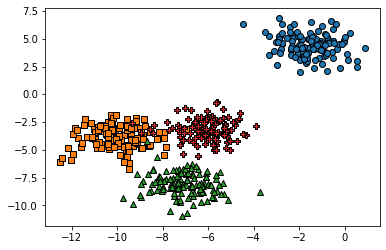

군집화 개수 : 2, 실루엣 점수 : 0.7049787496083262
군집화 개수 : 3, 실루엣 점수 : 0.5882004012129721
군집화 개수 : 4, 실루엣 점수 : 0.6505186632729437
군집화 개수 : 5, 실루엣 점수 : 0.5746932321727457
군집화 개수 : 6, 실루엣 점수 : 0.5150064498560357
군집화 개수 : 7, 실루엣 점수 : 0.39188677888839263


In [125]:
# Plotting
target_list = np.unique(y)
markers=['o', 's', '^', 'P','D','H','x']
# Mapping markets to targets, target==0, target==1, target==2 
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target] )
plt.show()

# Silhouette score 
no_clusters_silhouette([2,3,4,5,6,7],X)

# GMM 실습


## 데이터 로드 및 데이터 프레임

In [127]:
from sklearn.datasets import load_iris
import pandas as pd

In [129]:
iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

In [130]:
iris_df = pd.DataFrame(data = iris.data, columns = feature_names)

## 가우시안 모델 생성

In [134]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 3, random_state = 0)
gmm.fit(iris.data)

GaussianMixture(n_components=3, random_state=0)

In [137]:
gmm_cluster_labels = gmm.predict(iris.data)

In [140]:
iris_df['cluster'] = gmm_cluster_labels
iris_df['target'] = iris.target

In [141]:
iris_df.groupby(['target'])['cluster'].value_counts()

target  cluster
0       0          50
1       2          45
        1           5
2       1          50
Name: cluster, dtype: int64

## 가우시안 시각화

In [142]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture


In [143]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*','P','D','H','v','>','<']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[0])  #label
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

In [145]:
from sklearn.datasets import make_blobs
# 300 data set with 3 centers using make_blobs()
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

In [146]:
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

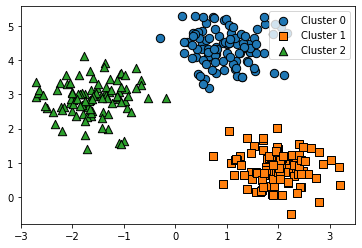

In [147]:
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

In [148]:
# Transformation for ellipse. 
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

In [150]:
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

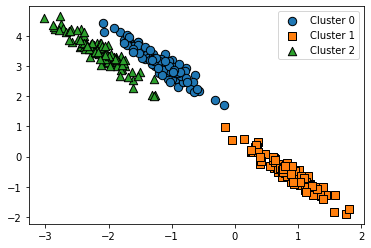

In [151]:
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

In [154]:
kmeans = KMeans(n_clusters = 3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

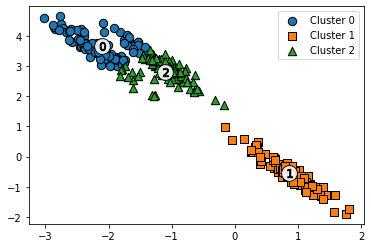

In [155]:
visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label',iscenter=True)

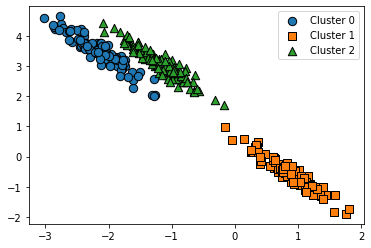

In [156]:
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label
visualize_cluster_plot(gmm, clusterDF, 'gmm_label',iscenter=False)

In [157]:
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


# MeanShift

In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

In [161]:
X, y = make_blobs(n_samples = 200, n_features = 2, centers = 3, 
                 cluster_std = 0.8, random_state = 0)

## 모델생성

In [163]:
meanshift = MeanShift(bandwidth = 0.9)
cluster_labels = meanshift.fit_predict(X)
cluster_labels

array([5, 0, 0, 1, 4, 1, 2, 6, 0, 1, 0, 1, 0, 0, 0, 1, 2, 2, 6, 3, 1, 2,
       0, 0, 3, 5, 7, 1, 5, 1, 6, 4, 1, 0, 2, 2, 0, 2, 7, 3, 2, 1, 3, 5,
       4, 4, 0, 1, 0, 0, 0, 2, 1, 5, 5, 1, 2, 2, 0, 4, 1, 5, 0, 2, 2, 1,
       2, 6, 1, 6, 7, 0, 0, 1, 5, 1, 2, 2, 2, 3, 1, 0, 0, 2, 2, 0, 0, 1,
       0, 2, 3, 1, 7, 0, 2, 0, 0, 1, 1, 2, 2, 4, 1, 0, 5, 5, 2, 0, 5, 6,
       0, 1, 2, 5, 0, 0, 6, 2, 1, 1, 2, 2, 1, 0, 2, 0, 3, 2, 1, 4, 1, 6,
       2, 2, 0, 2, 2, 0, 2, 1, 5, 1, 4, 2, 2, 0, 3, 3, 2, 0, 2, 3, 5, 1,
       0, 2, 2, 2, 0, 0, 6, 1, 1, 1, 0, 5, 2, 1, 2, 2, 6, 7, 5, 2, 1, 1,
       6, 3, 0, 6, 0, 1, 2, 2, 7, 6, 1, 2, 4, 4, 1, 1, 6, 2, 6, 2, 5, 2,
       0, 2], dtype=int64)

In [166]:
np.unique(cluster_labels)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [174]:
cluster_df = pd.DataFrame(data = X, columns = ['ftr1','ftr2'])
cluster_df['cluster_0_9'] = cluster_labels

In [175]:
cluster_df

,ftr1,ftr2,cluster_0_9
0,-1.692427,3.622025,5
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,1
4,1.214861,5.364896,4
...,...,...,...
195,2.956576,0.033718,2
196,-2.074113,4.245523,5
197,2.783411,1.151438,2
198,1.226724,3.620511,0


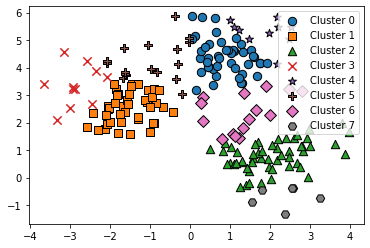

In [177]:
visualize_cluster_plot(meanshift, cluster_df, 'cluster_0_9', iscenter=False)

## MeanShift bandwidth 파라미터 조정

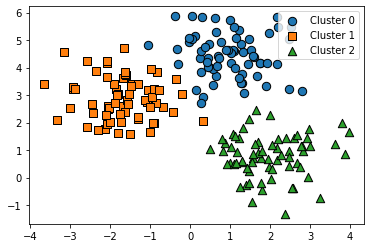

In [180]:
meanshift= MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
cluster_df['cluster_1_0'] = cluster_labels
visualize_cluster_plot(meanshift, cluster_df, 'cluster_1_0', iscenter=False)

## 최적의 bandwidth 파라미터 찾기

In [182]:
from sklearn.cluster import estimate_bandwidth

In [183]:
bandwidth = estimate_bandwidth(X, quantile = 0.2)

In [185]:
round(bandwidth,3)

1.444

In [187]:
meanshift = MeanShift(bandwidth = bandwidth)
cluster_labels = meanshift.fit_predict(X)

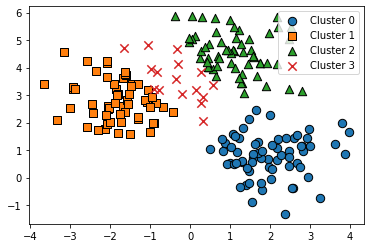

In [189]:
cluster_df['cluster_1_4'] = cluster_labels
visualize_cluster_plot(meanshift, cluster_df, 'cluster_1_4', iscenter=False)


In [191]:
# Comparison with original clusters
cluster_df['target'] = y
print(cluster_df.groupby('target')['cluster_1_4'].value_counts())


target  cluster_1_4
0       2              59
        3               8
1       0              67
2       1              58
        3               8
Name: cluster_1_4, dtype: int64


# DBSCAN 실습

## 데이터로드

In [192]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [193]:
iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

In [194]:
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

## 모델 생성

In [198]:
from sklearn.cluster import DBSCAN


dbscan = DBSCAN(eps  = 0.6, min_samples = 8, metric = 'euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

In [200]:
irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

In [201]:
iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


## 입실론 크기와 최소 데이터 수 조정하면서 성능 평가

In [203]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
irisDF['ftr1'] = pca_transformed[:,0]
irisDF['ftr2'] = pca_transformed[:,1]

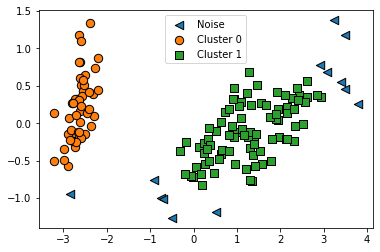

In [204]:
visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


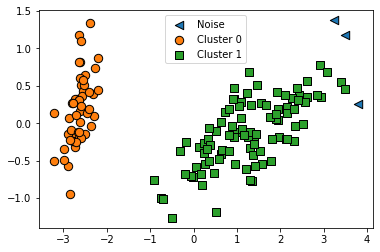

In [207]:
dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)
irisDF['dbscan_cluster'] = dbscan_labels
iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)
visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


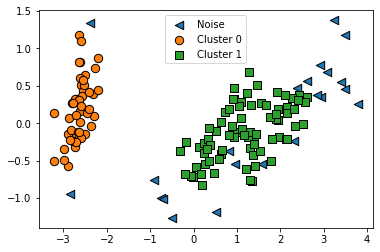

In [208]:

dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)
visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)


## 기하학적 데이터 분포를 군집화 하는 DBSCAN

In [209]:
from sklearn.datasets import make_circles
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [210]:
X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y


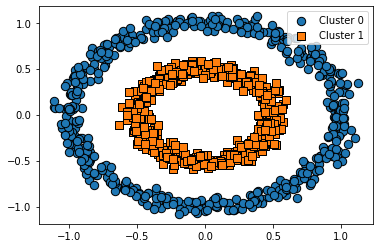

In [211]:
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)


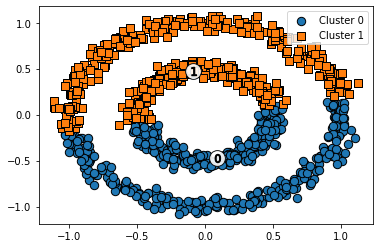

In [212]:
# Clustering using K-Means
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)

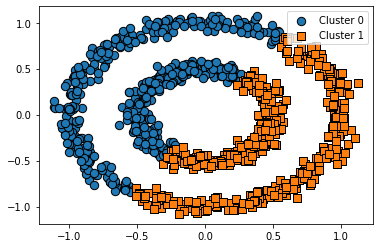

In [213]:
# Clustering using GMM 
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)

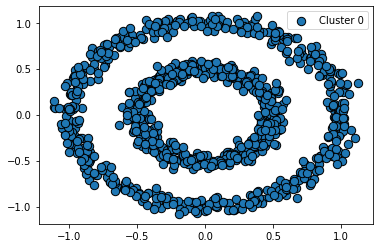

In [215]:
# Clustering using MeanShift with bandwidth=0.9
from sklearn.cluster import MeanShift
meanshift= MeanShift(bandwidth=0.9)
meanshift_label = meanshift.fit_predict(X)
clusterDF['ms_cluster'] = meanshift_label
visualize_cluster_plot(meanshift, clusterDF, 'ms_cluster', iscenter=False)


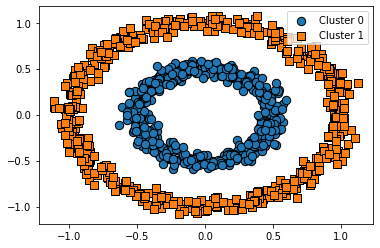

In [216]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)

## 군집화 LAB 실습

★ 오늘의 과제

1. K-평균 군집화 Lab  
1) sklearn 내의 boston 주택 가격 데이터에 대하여, 주택 가격을 제외한 변수들을 이용해서 7개의 군집들을 K-평균 군집화를 이용해서 만드시오.  
2) 7개의 군집을 2차원으로 축소한 후 그래프로 그리시오.  
3) 주택가격이 가장 낮은 군집의 특징을 설명하시오.  

2. 군집 데이터 생성 Lab  
1) 앞서 군집 생성에서  cluster_std 값을 0.4, 0.8, 1.2, 1.6으로 변경하면서 군집을 생성하고 이를 그래프로 그리시오.  
2) cluster_std값을 [0.4,0.8,1.6]으로 설정해서 군집을 생성하고 이를 그래프로 그리시오.  

3. 실루엣 점수 Lab  
1) boston 데이터 집합에 대하여 군집의 수를 몇 개로 하는 것이 좋을지 Silhouette score를 이용해서 평가하시오.  

## 1번 문제

In [220]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()
boston_df = pd.DataFrame(data = boston.data, columns = boston.feature_names)

boston_df['price'] = boston.target

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 7, init = 'k-means++',max_iter = 50, random_state = 0)
cluster_labels = kmeans.fit_predict(boston.data)


boston_df['clusters'] = cluster_labels
boston_df

In [231]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_data = pca.fit_transform(boston.data)

In [233]:
boston_df['ftr1'] = pca_data[:,0]
boston_df['ftr2'] = pca_data[:,1]

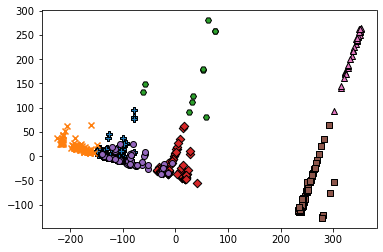

In [248]:
cluster_unique = boston_df['clusters'].unique()
markers=['o', 's', '^', 'P','D','H','x']
for label in cluster_unique:
    result_df = boston_df[boston_df['clusters'] == label]
    plt.scatter(x = result_df['ftr1'], y = result_df['ftr2'],
               marker = markers[label], edgecolor='k')

    

<AxesSubplot:xlabel='clusters', ylabel='price'>

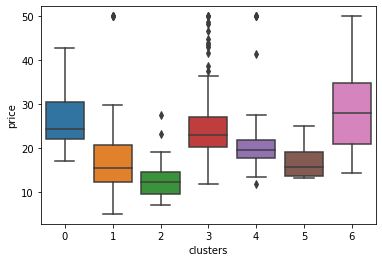

In [250]:
sns.boxplot(data =boston_df, x = 'clusters', y = 'price')

<AxesSubplot:xlabel='clusters', ylabel='CRIM'>

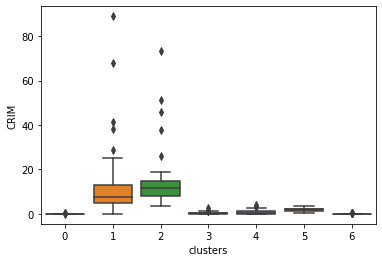

In [254]:
#범죄율이 가장 높고
sns.boxplot(data =boston_df, x = 'clusters', y = 'CRIM')

<AxesSubplot:xlabel='clusters', ylabel='CRIM'>

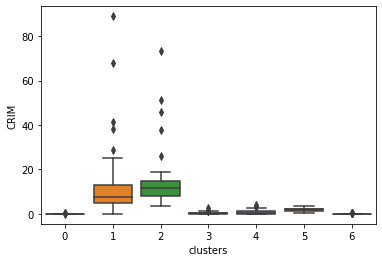

In [255]:
sns.boxplot(data =boston_df, x = 'clusters', y = 'CRIM')

<AxesSubplot:xlabel='clusters', ylabel='AGE'>

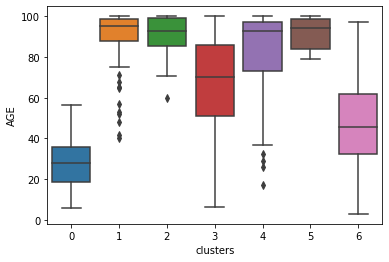

In [258]:
#오래됨
sns.boxplot(data =boston_df, x = 'clusters', y = 'AGE')

In [256]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,clusters,ftr1,ftr2
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,3,-119.818843,-5.560056
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,6,-168.890155,10.116209
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,6,-169.311707,14.080532
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,6,-190.230642,18.302463
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,6,-190.133451,16.097947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,3,-138.697933,5.781485
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,3,-139.504439,1.039389
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,3,-138.387163,0.938092
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,3,-137.505173,4.251825


## 2번 문제

In [259]:
from sklearn.datasets import make_blobs

군집 데이터 생성 Lab
1) 앞서 군집 생성에서 cluster_std 값을 0.4, 0.8, 1.2, 1.6으로 변경하면서 군집을 생성하고 이를 그래프로 그리시오.
2) cluster_std값을 [0.4,0.8,1.6]으로 설정해서 군집을 생성하고 이를 그래프로 그리시오.

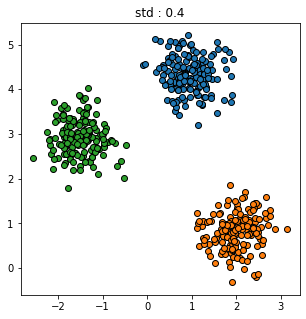

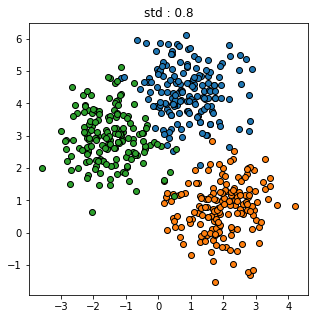

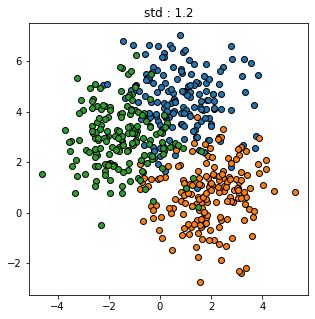

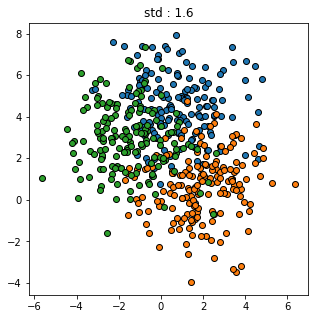

In [283]:
cluster_std = [0.4,0.8,1.2,1.6]
for std in cluster_std:
    X,y = make_blobs(n_samples = 500, cluster_std = std, n_features = 2, centers = 3, random_state = 0)
    cluster_df = pd.DataFrame(data = X, columns = ['ftr1','ftr2'])
    cluster_df['clusters'] = y
    cluster_labels = np.unique(y)
    
    plt.figure(figsize = (5,5))
    for label in cluster_labels:
        result_df = cluster_df[cluster_df['clusters'] == label]
        plt.scatter(x = result_df['ftr1'],y = result_df['ftr2'], edgecolor = 'k')
        plt.title("std : {}".format(std))

   

         
            
        
    
    

## 3번 문제


   
    


In [284]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()
boston_df = pd.DataFrame(data = boston.data, columns = boston.feature_names)

boston_df['price'] = boston.target

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 7, init = 'k-means++',max_iter = 50, random_state = 0)
cluster_labels = kmeans.fit_predict(boston.data)


boston_df['clusters'] = cluster_labels
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price,clusters
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,3
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,6
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,6
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,3
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,3
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,3
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,3


In [288]:
from sklearn.metrics import silhouette_samples, silhouette_score

k_number = [2,3,4,5,6]
score = []
for number in k_number:
    kmeans = KMeans(n_clusters = number, init = 'k-means++', max_iter = 50)
    kmeans_cluster = kmeans.fit_predict(boston.data)
    score.append(silhouette_score(boston.data, kmeans_cluster))

[0.6914045749383209, 0.7234282475858964, 0.568244696956532, 0.5707677989827684, 0.5012881249837046]


<AxesSubplot:>

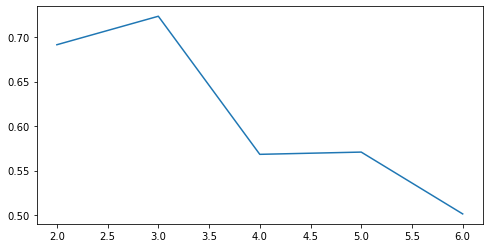

In [295]:
import seaborn as sns
print(score)
plt.figure(figsize=(8,4))
sns.lineplot(y = score, x = range(2,7))

#3개가 최적
